**Breast_cancer_logistic regression**

▶ **PROBLEM STATMENT** : Is to predict wether
tumor is malignant (cancerous) or benign (non-cancerous) based on certain features of the tumor

▶ **MODEL USED** : logistic regression

so problem is sovled by using logistic reggression and so our goal is to reduce loss function ,

▶ steups to perform (data preprocessing)
Import Libraries and Dataset

   1. Handle Missing Data

   2. Encoding Categorical Data

   3. Outlier Detection and Removal

   4. Feature Scaling

   5. Feature Selection

   6. Handle Imbalanced Data

   7. Splitting Dataset





In [3]:
#importing important lib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk



# step-0. Loading breast cancer data set using sklearn in df

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df.head()





,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#step-1

#now check null values
df.isnull().sum() 

# so there is no null values in the data set

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
#step-2

# now lets check for categorical values
df.dtypes
# so there is no categorical values in the data set

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

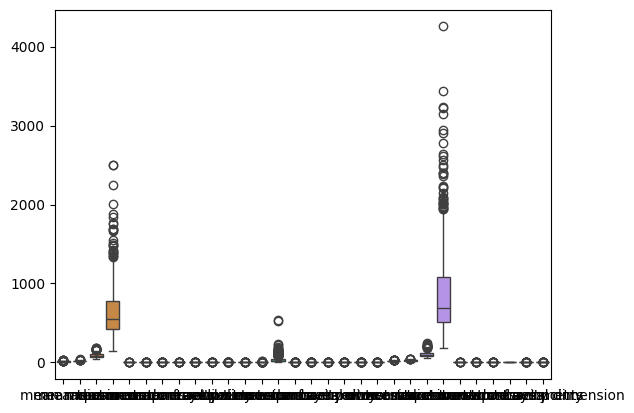

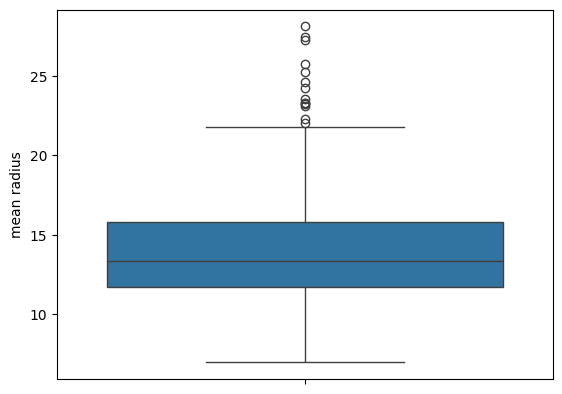

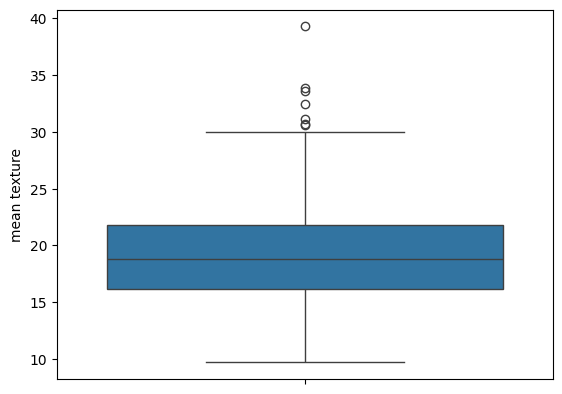

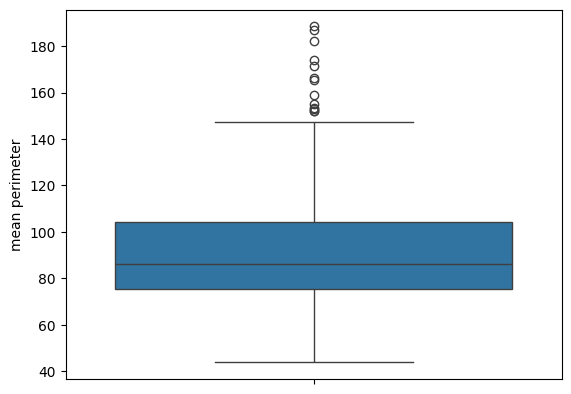

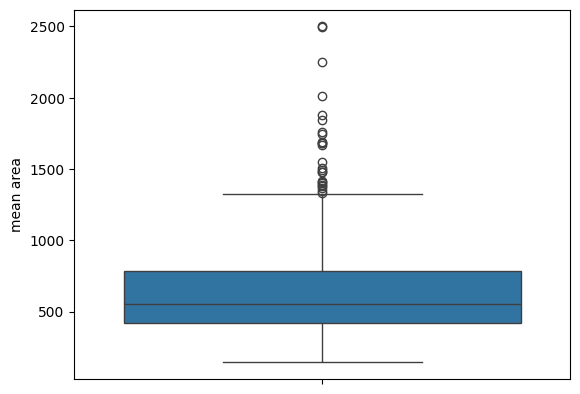

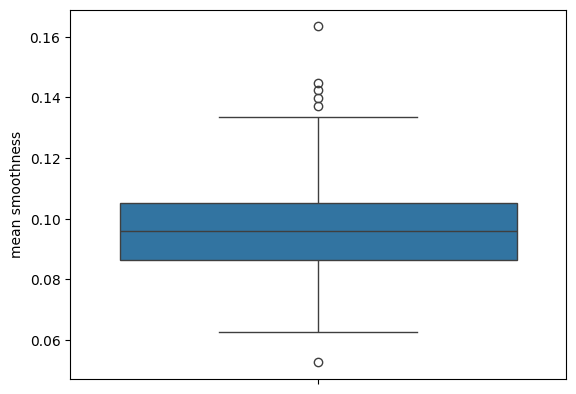

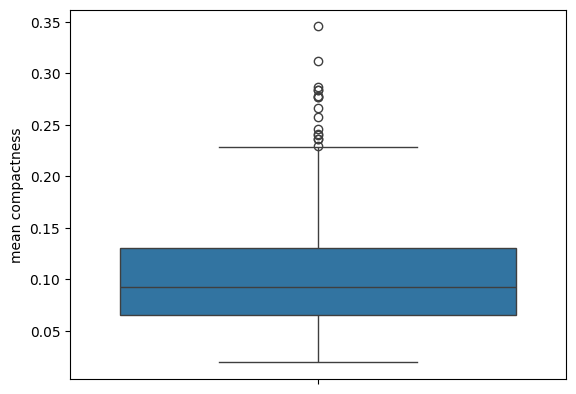

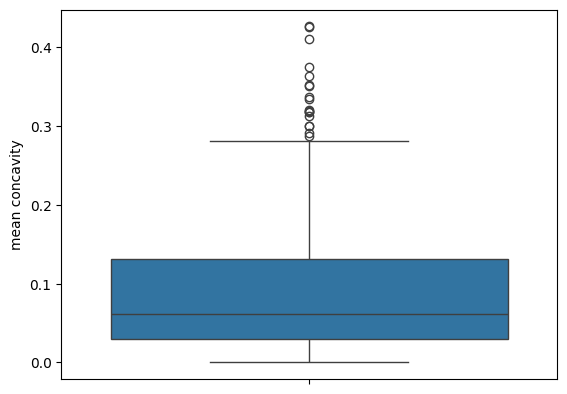

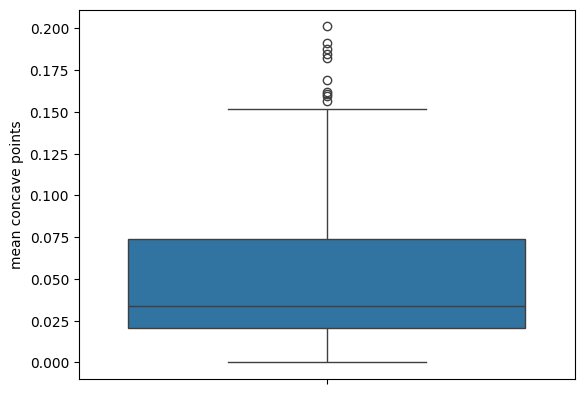

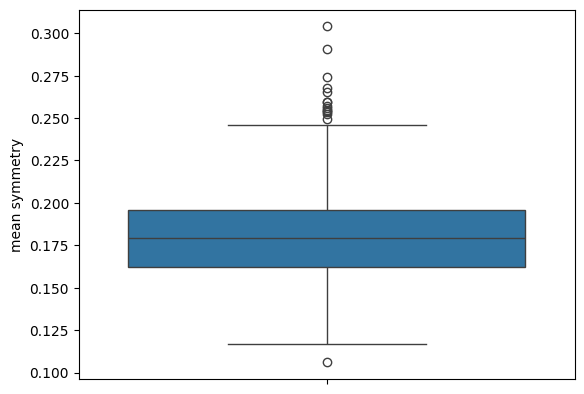

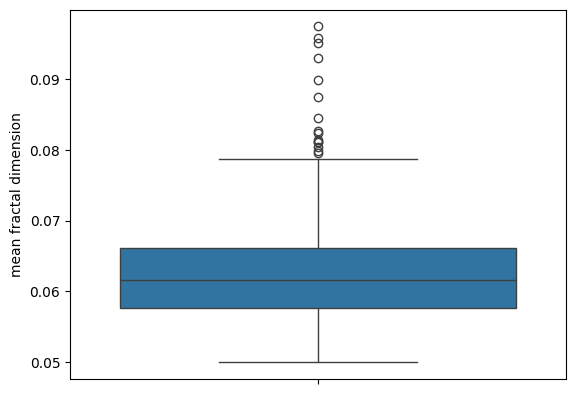

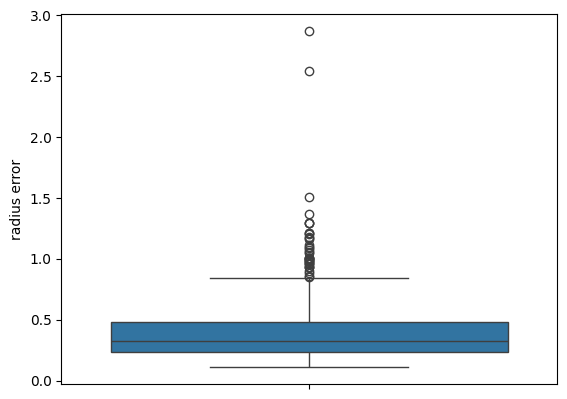

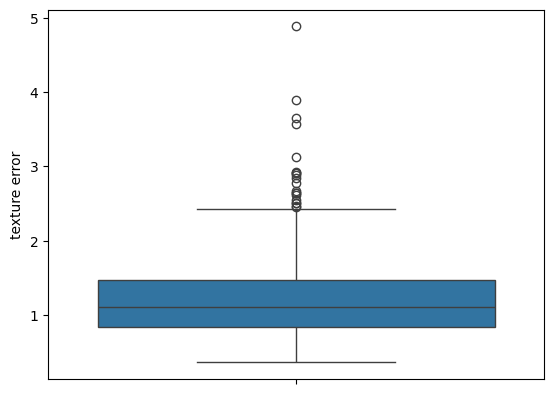

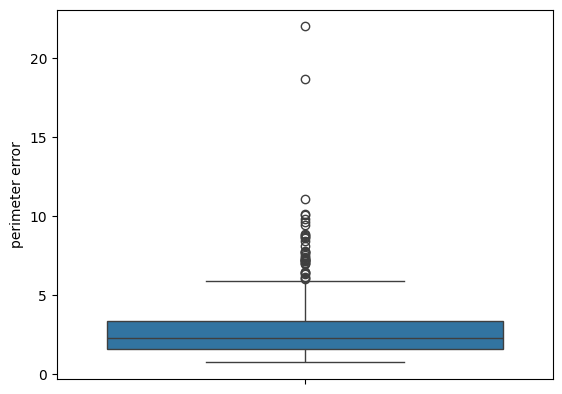

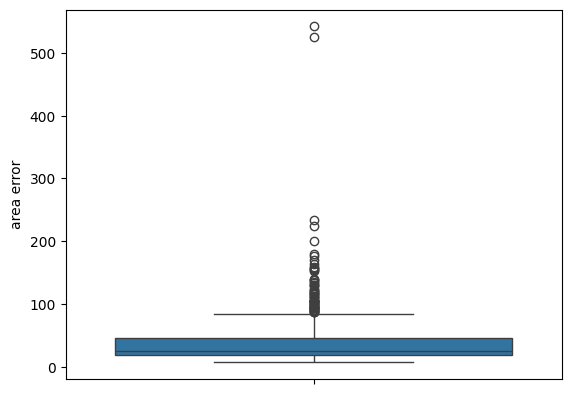

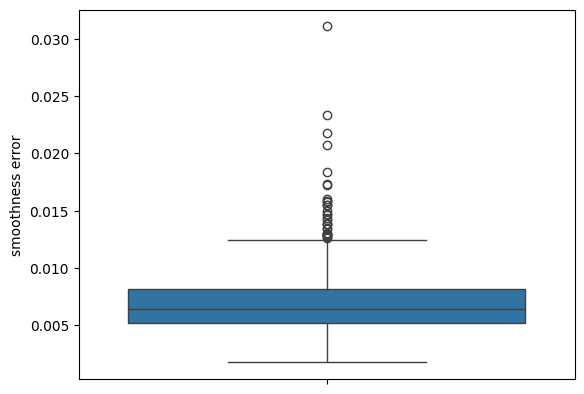

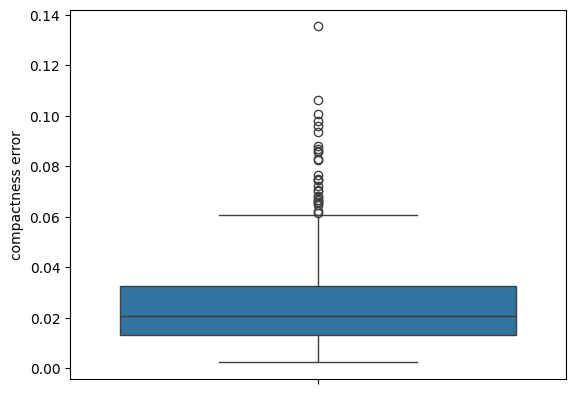

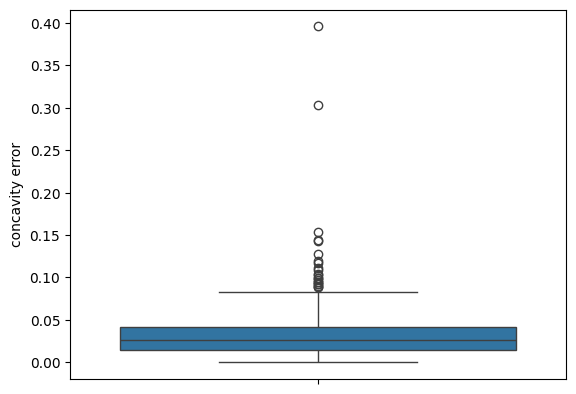

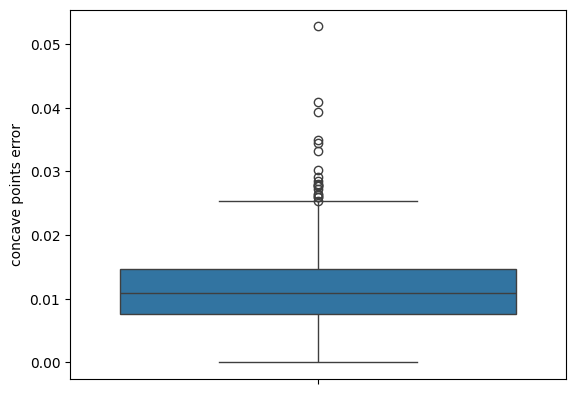

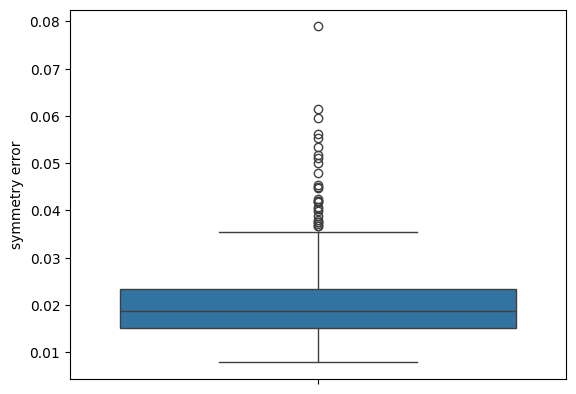

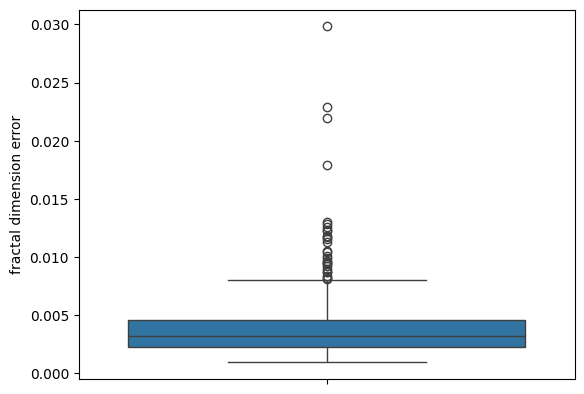

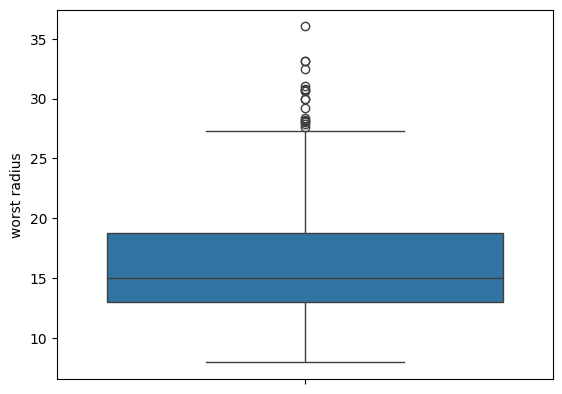

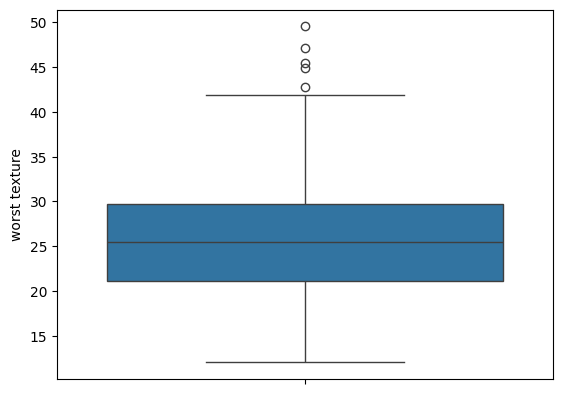

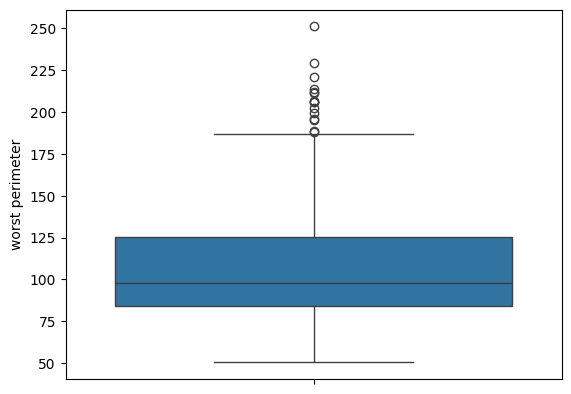

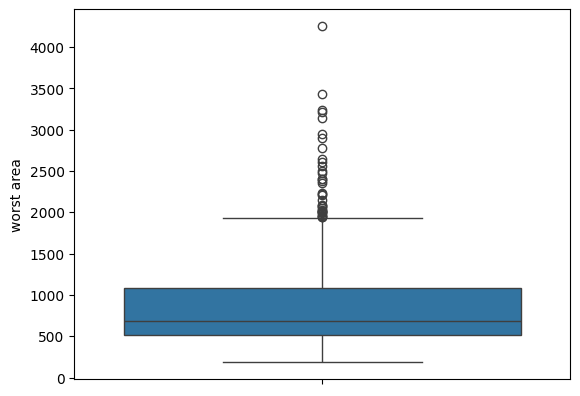

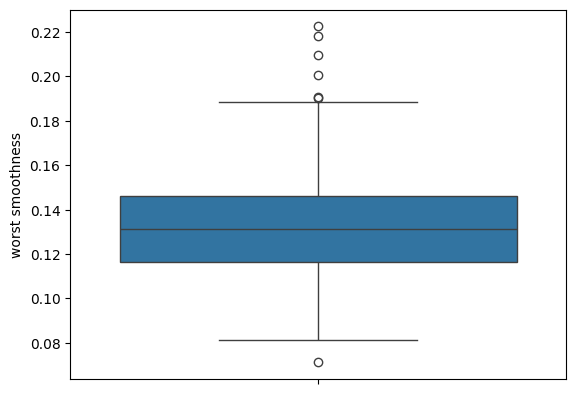

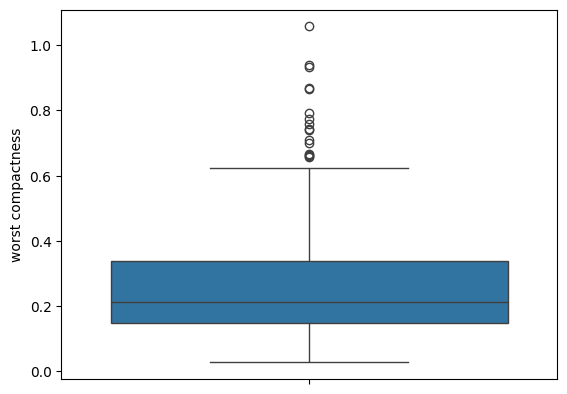

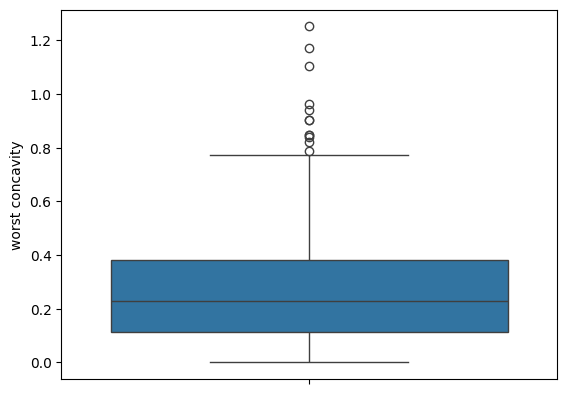

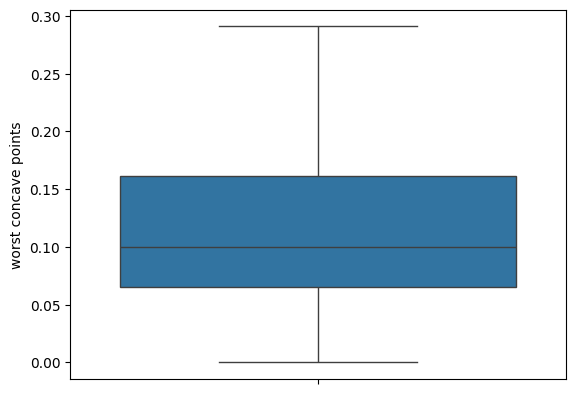

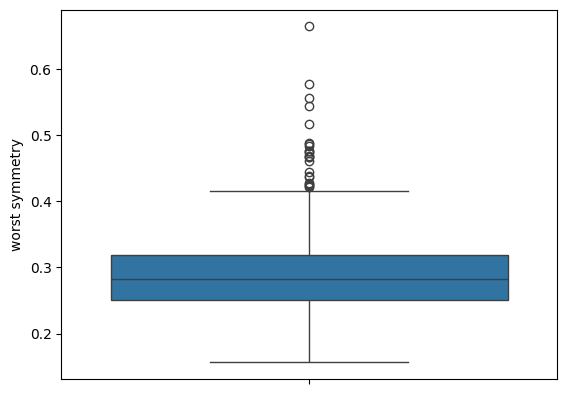

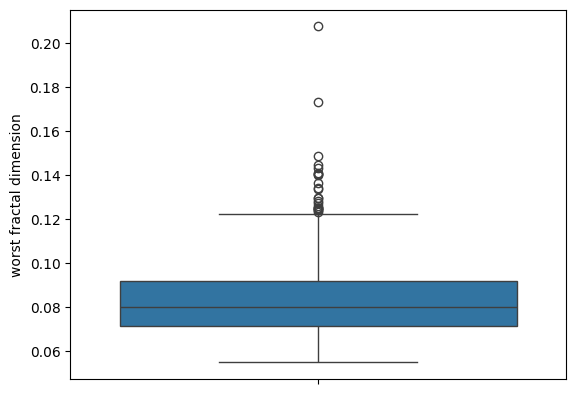

In [10]:
# now detect outliers 
sns.boxplot(df)
plt.show()
#boxplot for each feature using a loop
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()


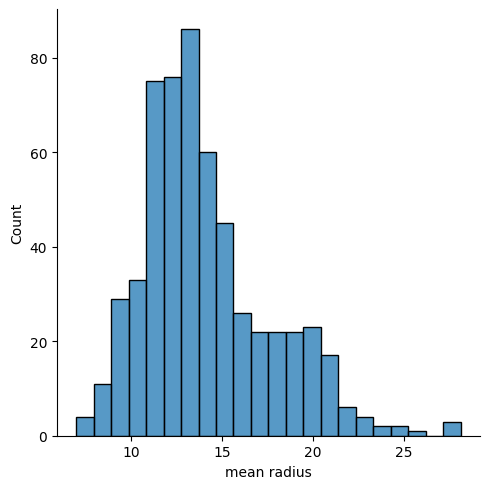

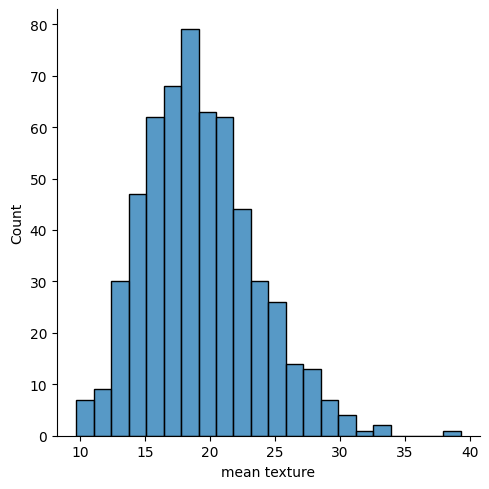

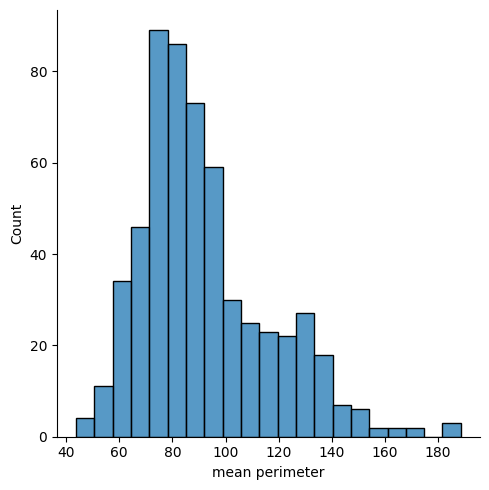

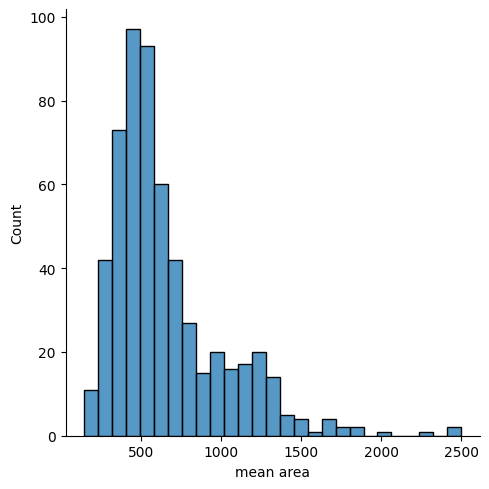

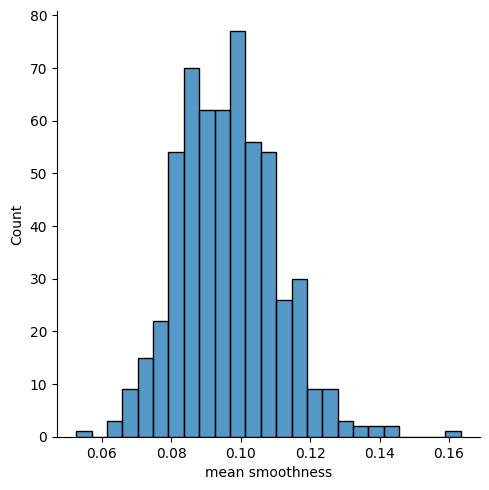

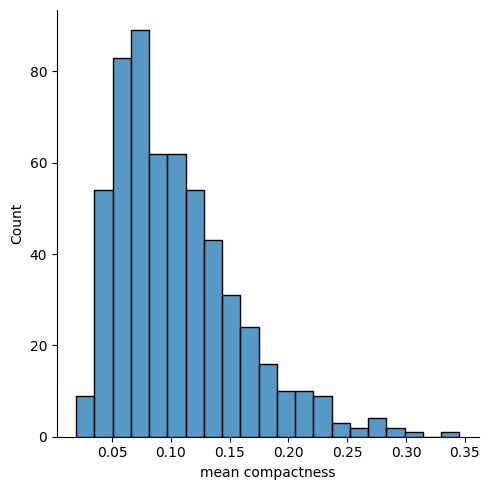

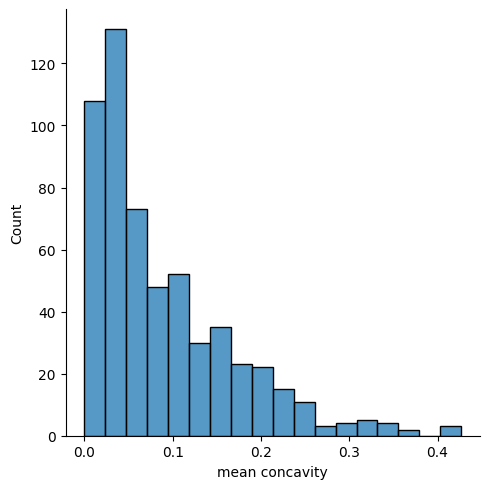

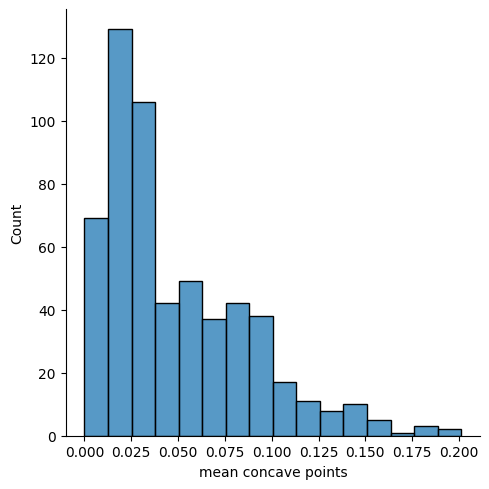

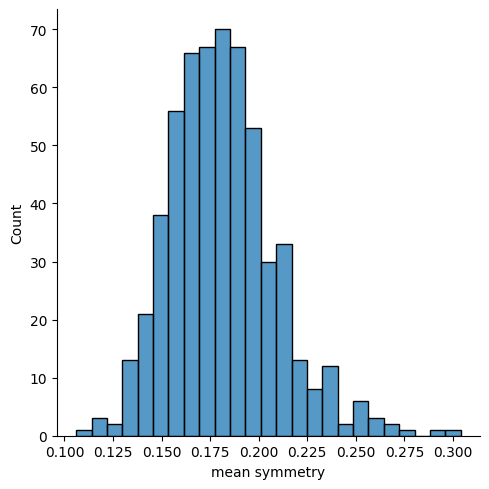

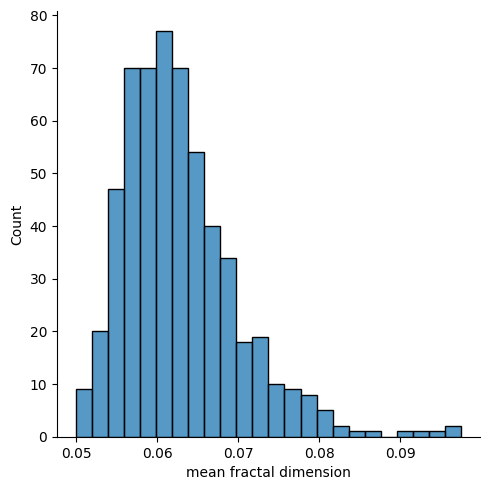

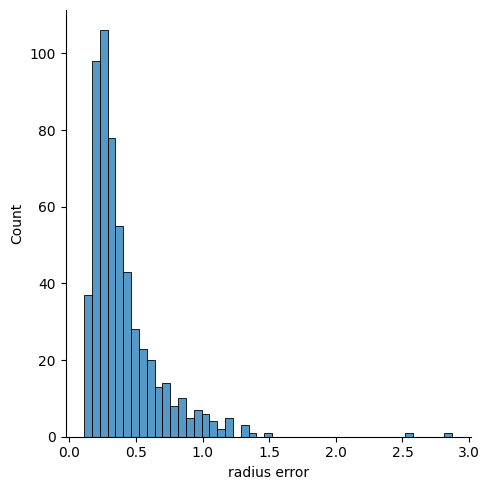

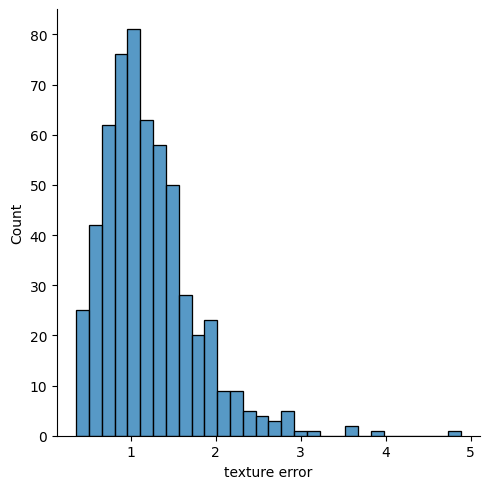

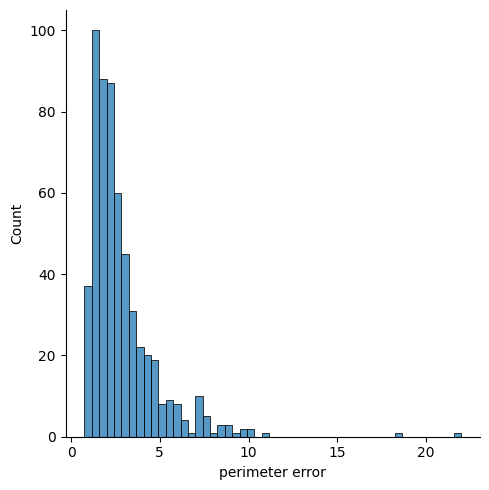

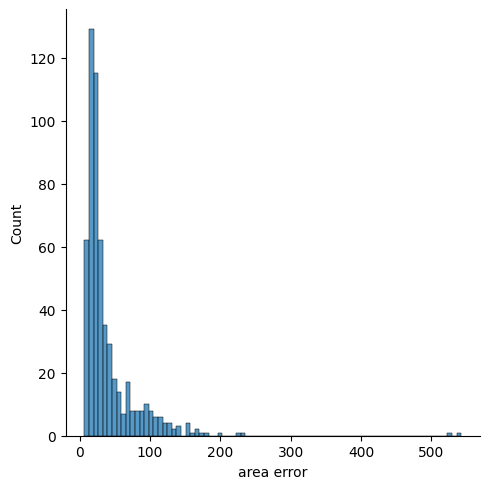

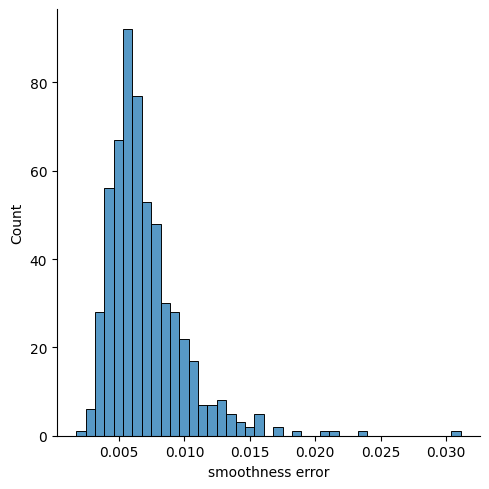

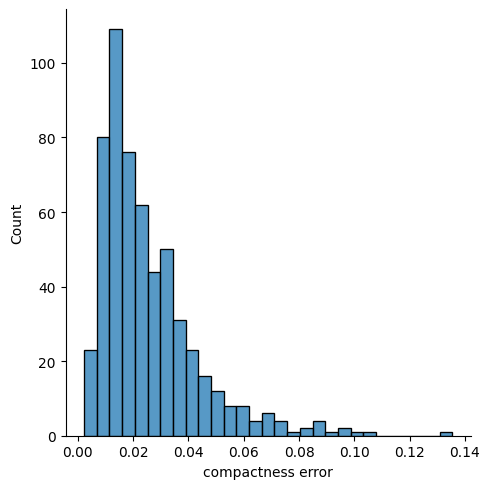

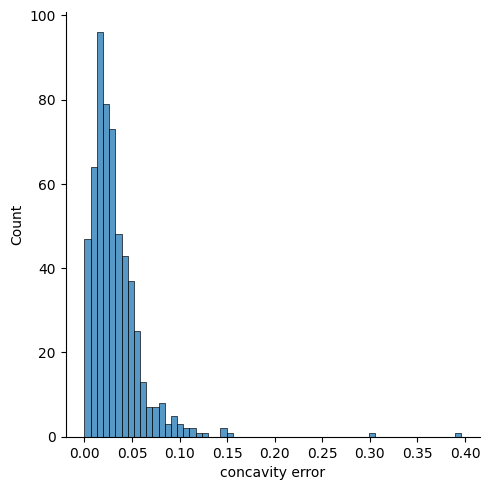

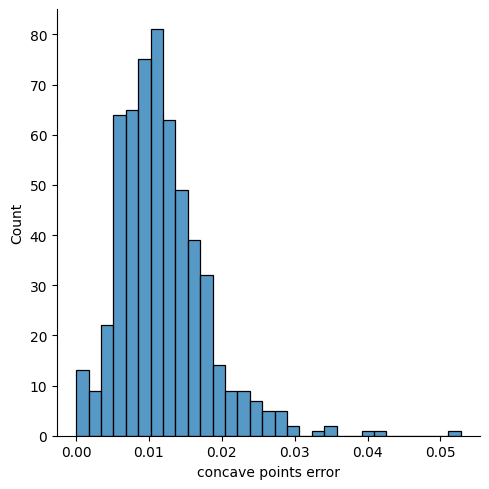

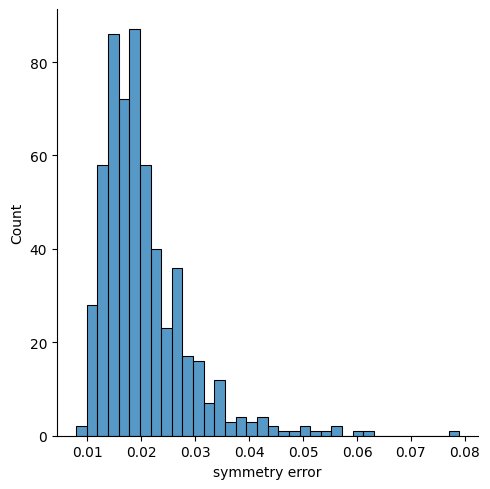

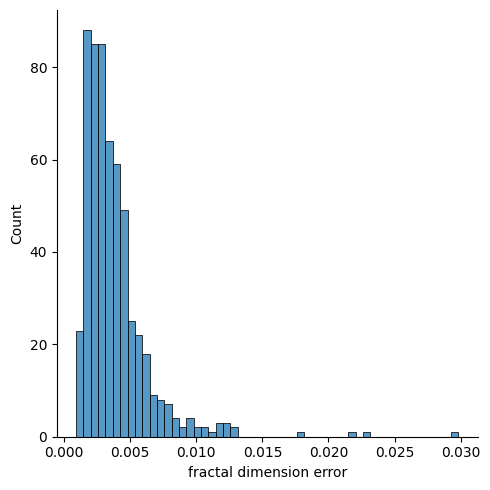

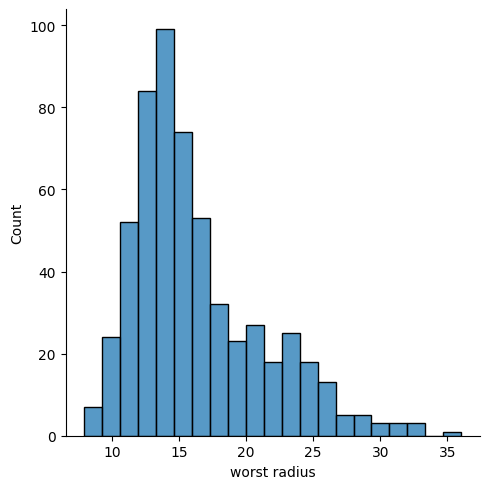

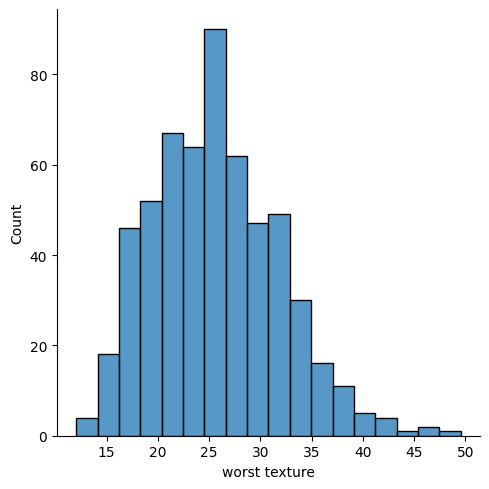

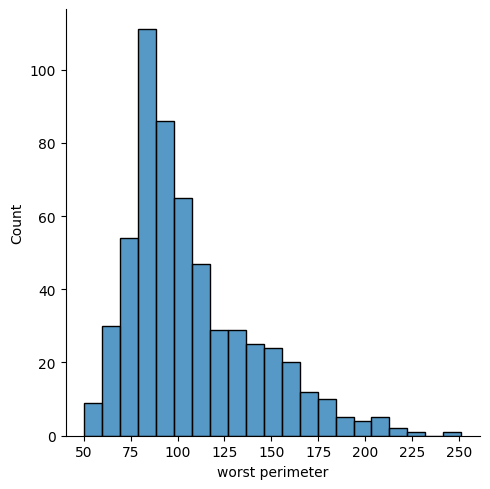

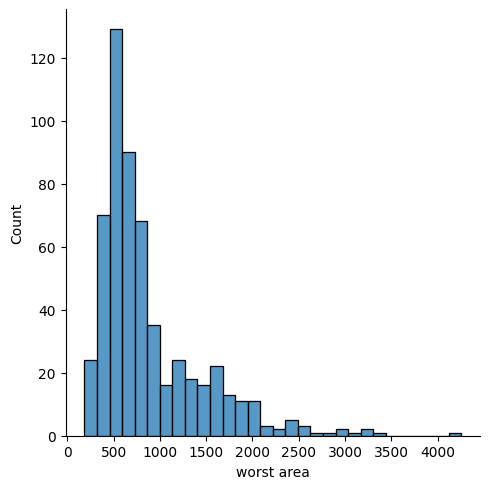

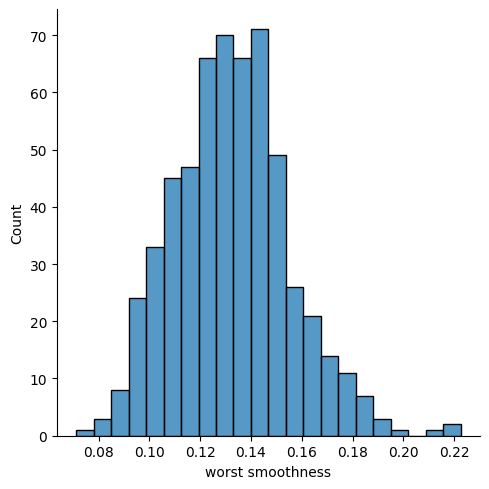

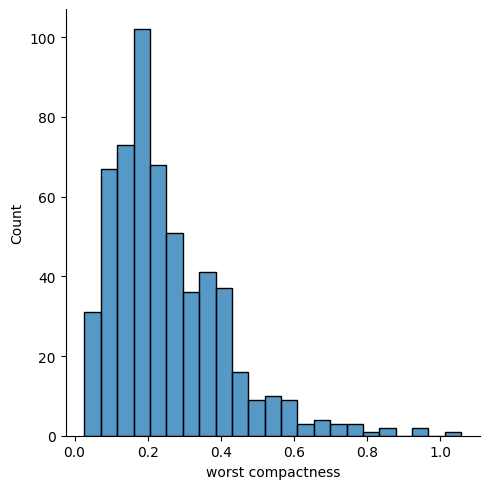

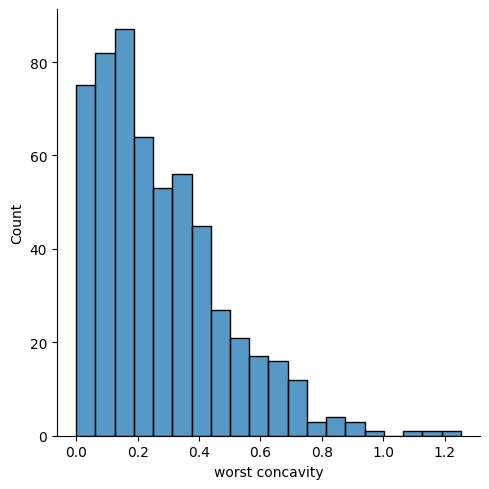

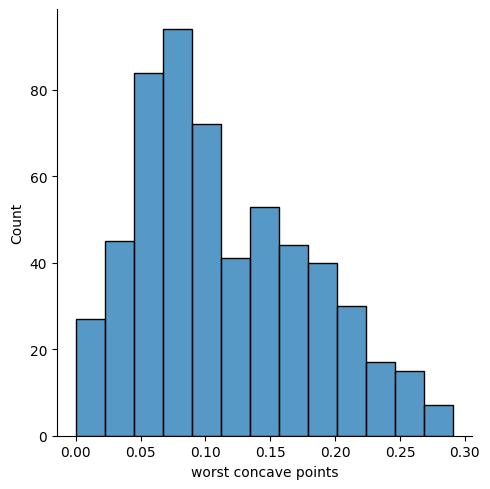

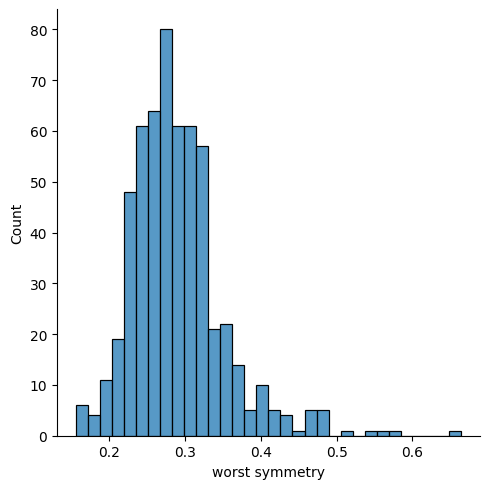

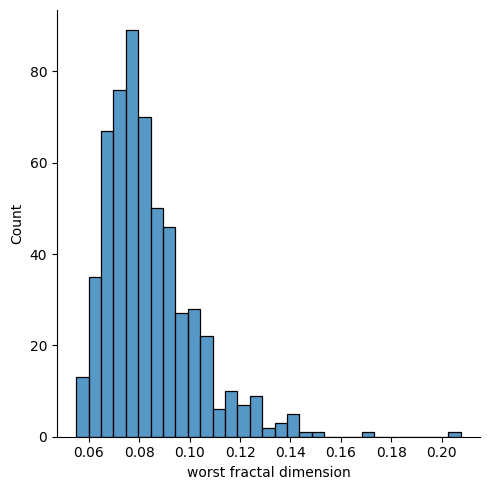

In [12]:
# plotting distplot for each feature
for i in df.columns:
    sns.displot(df[i])
    plt.show()

<Axes: xlabel='mean radius'>

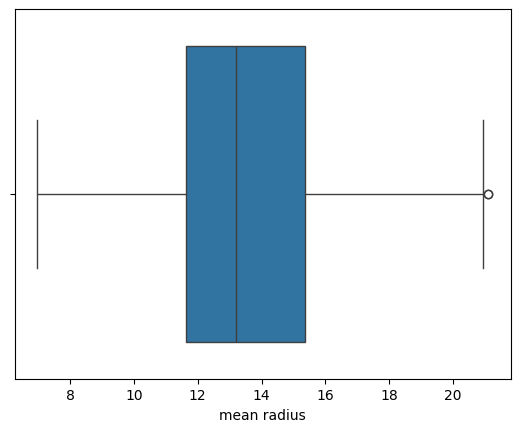

In [15]:
#now removing outliers
# for first feature beacuse distplot is skewed so we will use IQR method
Q1 = df['mean radius'].quantile(0.25)   
Q3 = df['mean radius'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['mean radius'] < (Q1 - 1.5 * IQR)) |(df['mean radius'] > (Q3 + 1.5 * IQR)))]
sns.boxplot(x=df['mean radius'])